'''A pergunta a ser respondida com a análise exploratória é: existe alguma correlação entre o uso de energia elétrica e/ou 
petróleo per capita de um país e seu IDH (Índice de Desenvolvimento Humano)? Caso exista, como se dá esta correlação?'''


In [2]:
#Eduardo Cunha

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

#Importando os arquivos

IDH = pd.read_excel('HDI.xlsx')
elecpc = pd.read_excel('Electricity Consumption per capita.xlsx')
oilpc = pd.read_excel('Oil Consumption per capita.xlsx')


In [3]:
#Selecionando os dados de 2007

IDH_2007 = IDH.loc[:, ['HDI', 2007]]
elecpc_2007 = elecpc.loc[:, ['Electricity consumption, per capita (kWh)', '2007']]
oilpc_2007 = oilpc.loc[:, ['Oil Consumption per capita (tonnes per year)', 2007]]

#Mudando o índice

IDH_idx = IDH_2007.set_index('HDI')
elecpc_idx = elecpc_2007.set_index('Electricity consumption, per capita (kWh)')
oilpc_idx = oilpc_2007.set_index('Oil Consumption per capita (tonnes per year)')

In [4]:
#Juntando os dados e limpando os NaNs

df = IDH_idx.join(elecpc_idx, how = 'inner', lsuffix = '_HDI', rsuffix = '_ECPC (kWh)')

data = df.join(oilpc_idx, how = 'inner', rsuffix = '_OCPC (tonnes)')

data.columns = ['2007_HDI', '2007_ECPC (kWh)', '2007_OCPC (tonnes)']    #renomeando as colunas

data.dropna(axis = 0, how = 'any', thresh = None, subset = None, inplace = True)   #Limpa as linhas que possuem qualquer NaN
data

,2007_HDI,2007_ECPC (kWh),2007_OCPC (tonnes)
Algeria,0.680,870.586163,0.380591
Argentina,0.780,2351.482559,0.589127
Australia,0.922,10874.528333,1.975960
Austria,0.870,8180.307701,1.611835
Bangladesh,0.478,200.802874,0.031543
Belarus,0.738,3394.246862,0.782568
Brazil,0.700,2169.129260,0.525743
Bulgaria,0.758,4455.750856,0.692318
Canada,0.900,16847.884400,3.118107
Chile,0.789,3311.677825,0.969642


In [5]:
data.describe()

,2007_HDI,2007_ECPC (kWh),2007_OCPC (tonnes)
count,60.000000,60.000000,60.000000
mean,0.773633,6357.280867,1.483980
std,0.113896,6486.107769,1.615812
min,0.478000,200.802874,0.031543
25%,0.698500,2284.044368,0.527476
50%,0.784500,4673.854781,1.028605
75%,0.871750,7680.946431,1.841385
max,0.942000,36852.544886,10.341927


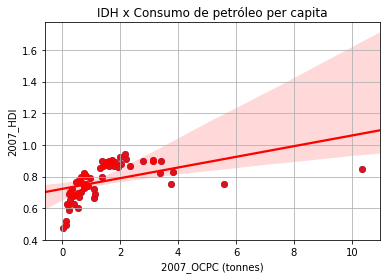

In [6]:
#Plotando primeiro scatter, IDH x Consumo de petróleo per capita  

plt.scatter(data['2007_OCPC (tonnes)'], data['2007_HDI'])
plt.ylabel('HDI')
plt.xlabel('Oil Consumption per capita (tonnes)')
plt.title('IDH x Consumo de petróleo per capita')
sns.regplot(data['2007_OCPC (tonnes)'], data['2007_HDI'], color = 'r')
plt.grid(True)

Percebe-se uma associação entre as duas variáveis

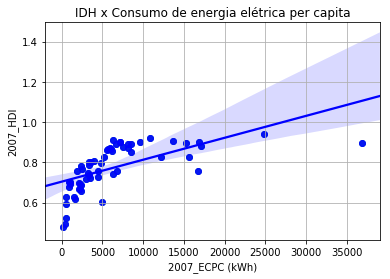

In [7]:
#Plotando o segundo scatter, IDH x Consumo de energia elétrica per capita

plt.scatter(data['2007_ECPC (kWh)'], data['2007_HDI'])
plt.ylabel('HDI')
plt.xlabel('Electricity Consumption per capita (kWh)')
plt.title('IDH x Consumo de energia elétrica per capita')
sns.regplot(data['2007_ECPC (kWh)'], data['2007_HDI'], color = 'b')
plt.grid(True)

Percebe-se uma associação entre as duas variáveis

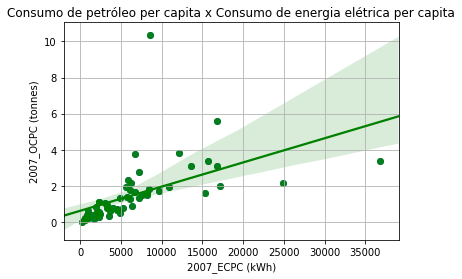

In [8]:
#Plotando terceiro scatter, Consumo de petróleo per capita x Consumo de energia elétrica per capita

plt.scatter(data['2007_ECPC (kWh)'], data['2007_OCPC (tonnes)'])
plt.ylabel('Oil Consumption per capita (tonnes)')
plt.xlabel('Electricity Consumption per capita (kWh)')
plt.title('Consumo de petróleo per capita x Consumo de energia elétrica per capita')
sns.regplot(data['2007_ECPC (kWh)'], data['2007_OCPC (tonnes)'], color = 'g')
plt.grid(True)

Percebe-se uma associação entre as duas variáveis

In [9]:
#Tabela de correlação entre as variáveis
data.corr('pearson') 

,2007_HDI,2007_ECPC (kWh),2007_OCPC (tonnes)
2007_HDI,1.000000,0.620477,0.477035
2007_ECPC (kWh),0.620477,1.000000,0.536321
2007_OCPC (tonnes),0.477035,0.536321,1.000000


{'boxes': [<matplotlib.lines.Line2D at 0x1b7b39f0f98>],
 'caps': [<matplotlib.lines.Line2D at 0x1b7b39f99e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b7b3a036a0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1b7b3a03278>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1b7b39f9128>,
  <matplotlib.lines.Line2D at 0x1b7b39f95c0>]}

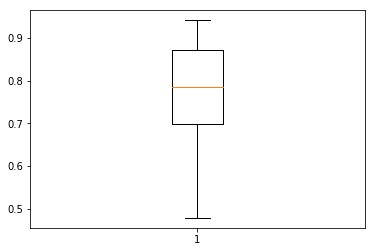

In [15]:
plt.boxplot(data['2007_HDI'])

{'boxes': [<matplotlib.lines.Line2D at 0x1b7b34f5da0>],
 'caps': [<matplotlib.lines.Line2D at 0x1b7b34f54e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b7b3540390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1b7b35407f0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1b7b34f56a0>,
  <matplotlib.lines.Line2D at 0x1b7b34f50b8>]}

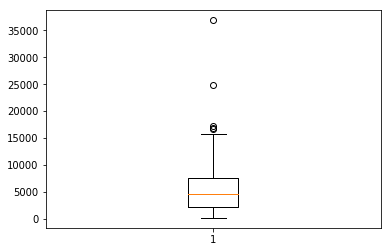

In [11]:
plt.boxplot(data['2007_ECPC (kWh)'])

{'boxes': [<matplotlib.lines.Line2D at 0x1b7b38b0198>],
 'caps': [<matplotlib.lines.Line2D at 0x1b7b38b0ba8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b7b38e7860>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1b7b38e7438>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1b7b38b02e8>,
  <matplotlib.lines.Line2D at 0x1b7b38b0780>]}

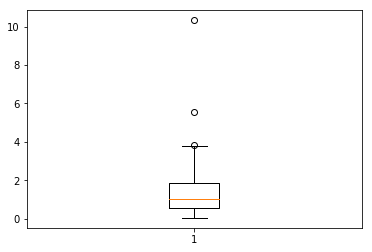

In [13]:
plt.boxplot(data['2007_OCPC (tonnes)'])

(array([27., 18.,  6.,  2.,  5.,  0.,  1.,  0.,  0.,  1.]),
 array([  200.8028742 ,  3865.97707539,  7531.15127659, 11196.32547778,
        14861.49967898, 18526.67388018, 22191.84808137, 25857.02228257,
        29522.19648376, 33187.37068496, 36852.54488616]),
 <a list of 10 Patch objects>)

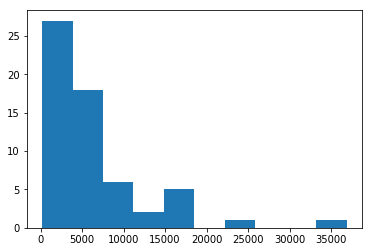

In [17]:
plt.hist(data['2007_ECPC (kWh)'])